# Tabu Search applyed to Eggholder function

Objective: $min$
$
f(x,y) = -(y+47)\sin\sqrt{\mid \frac{x}{2}+(y+47)\mid}-x\sin\sqrt{\mid x-(y+47)}
$

Limits $-512 \le x,y \le 512$


## Functions

In [4]:
import numpy as np
import random

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Generate a random 22-bit binary string
def binary_string():
    return ''.join(random.choices(['0', '1'], k=22))

# Convert binary string to floating point number
def binary_to_float(binary):
    decimal = int(binary, 2)
    scaled_decimal = (decimal / ((2 ** 22) - 1)) * 1024 - 512
    return scaled_decimal

# Define the objective function
def objective_function(x, y):
    x = binary_to_float(x)
    y = binary_to_float(y)
    a = np.sqrt(abs(x/2 + (y + 47)))
    b = np.sqrt(abs(x - (y + 47)))
    c = -(y + 47) * np.sin(a) - x * np.sin(b)
    return c

# Define the initial solution
def initial_solution():
    x = binary_string()
    y = binary_string()
    return [x, y]

# Define the neighbourhood function
def neighbourhood_function(x, y, neighbourhood_length = 15, long_term_memory = []):
    neighbourhood = []
    possible_moves = [i for i in range(22)]
    for _ in range(neighbourhood_length):
        index_x = random.choice(possible_moves)
        index_y = random.choice(possible_moves)
        while [index_x, index_y] in long_term_memory:
            index_x = random.choice(possible_moves)
            index_y = random.choice(possible_moves)
        x_neighbour = x
        y_neighbour = y
        x_neighbour = x_neighbour[:index_x] + str(1 - int(x_neighbour[index_x])) + x_neighbour[index_x+1:]
        y_neighbour = y_neighbour[:index_y] + str(1 - int(y_neighbour[index_y])) + y_neighbour[index_y+1:]
        neighbourhood.append([x_neighbour, y_neighbour])
        
    return neighbourhood

# Return the move that generated a neighbourhood element
def reverse_move(x, y, x_neighbour, y_neighbour):
    move = []
    for i in range(22):
        if x[i] != x_neighbour[i]:
            move.append(i)
            break
    for i in range(22):
        if y[i] != y_neighbour[i]:
            move.append(i)
            break
    return move

# Define the aspiration criteria
def aspiration_criteria(x, y, x_neighbour, y_neighbour):
    if objective_function(x_neighbour, y_neighbour) < objective_function(x, y):
        return True
    else:
        return False

# Define the frequence moves in the long-term memory
def frequence_moves(long_term_memory):
    long_term_memory_array = np.array(long_term_memory)
    # Flatten the array to a 1D array
    flattened_array = long_term_memory_array.flatten()
    # Get the indice of the greatest value
    indices = np.argsort(flattened_array)[-10:]

    # Convert the indice to a 2D array index
    indices_x = indices // 22
    indices_y = indices % 22

    moves = []
    for i in range(len(indices_x)):
        moves.append([indices_x[i], indices_y[i]])
    
    return moves

## Parameters

In [5]:
MAX_ITERATIONS = 10000
TABU_LENGTH = 20
NEIGHBOURHOOD_LENGTH = 15
MEDIUM_TERM_MEMORY_LENGTH = 50
LONG_TERM_MEMORY_LENGTH = 484

## Tabu Search Algorithm for one execution

0 - Best solution value: -269.4522281012156 - Mean: 328.14367660646604
1 - Best solution value: -320.0882651659367 - Mean: -126.64641629998405
2 - Best solution value: -320.0882651659367 - Mean: -152.57944522639409
3 - Best solution value: -321.3193614271669 - Mean: -109.96795294461532
4 - Best solution value: -321.87587118311205 - Mean: -78.43728678367309
5 - Best solution value: -431.220040318922 - Mean: -209.67805177518105
6 - Best solution value: -431.220040318922 - Mean: -50.95737732541624
7 - Best solution value: -431.220040318922 - Mean: -251.60663367779358
8 - Best solution value: -431.9668992374926 - Mean: -186.52822336306588
9 - Best solution value: -436.32092187834905 - Mean: -129.26081092094373
10 - Best solution value: -438.17607451930127 - Mean: -134.0390270281215
11 - Best solution value: -438.22313358252774 - Mean: -102.18384646173406
12 - Best solution value: -438.3299775179174 - Mean: -259.20156331658995
13 - Best solution value: -438.5113941448388 - Mean: -166.695067

C:\Users\rafel\AppData\Local\Temp\ipykernel_46956\3693536011.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


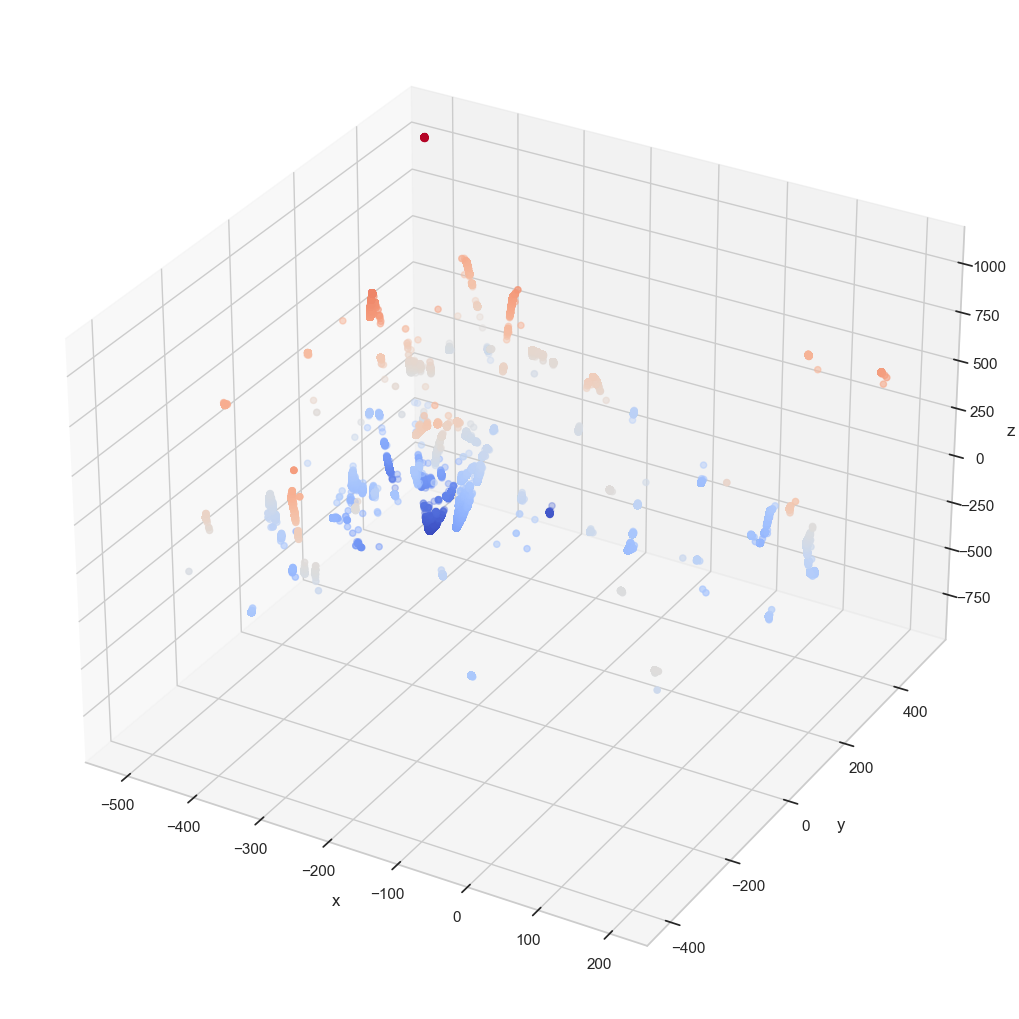

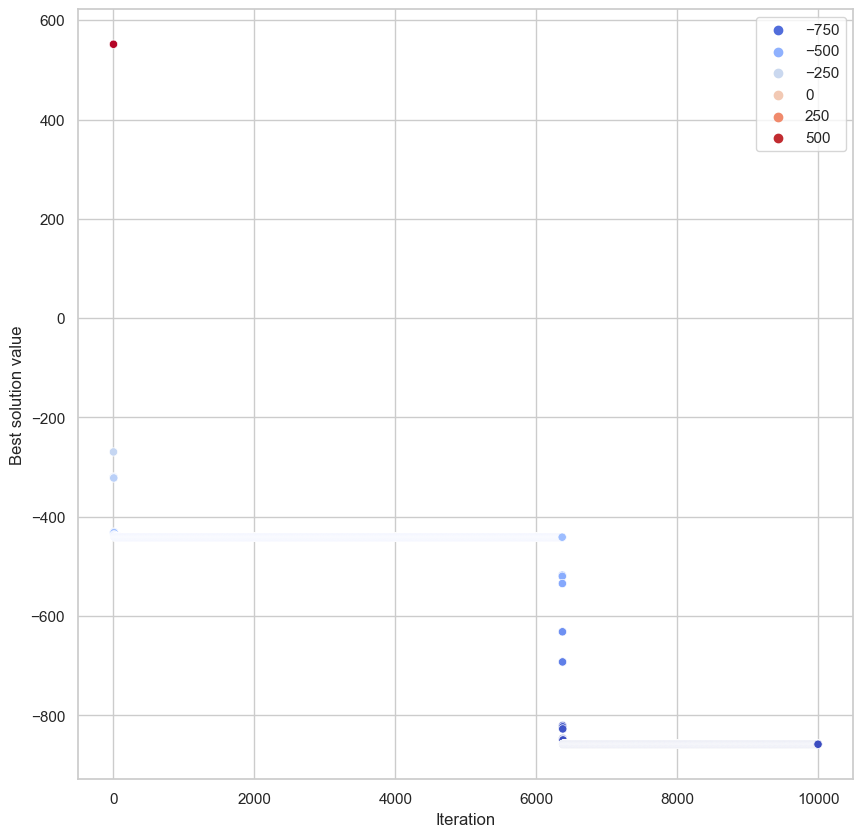

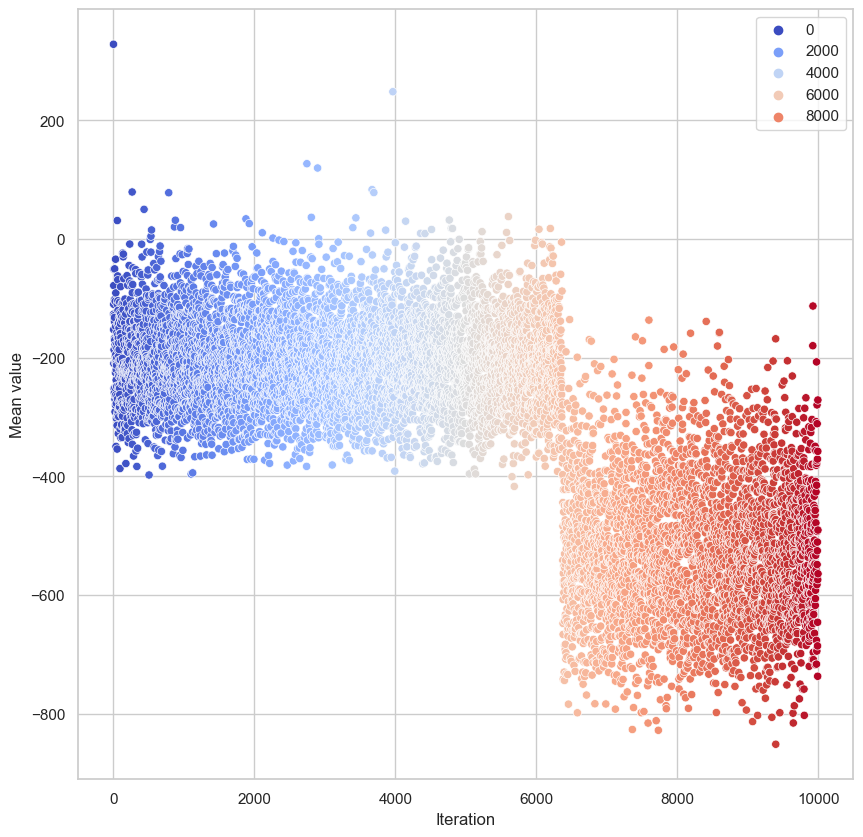

In [25]:
x, y, z, ite = [], [], [], []
mean_values = []
mean_values_ite = []
best_x, best_y, best_z, best_ite = [], [], [], []

index_to_remove = []

# Initialize the Tabu List
tabu_list = []
# Initialize the medium-term memory
medium_term_memory = []
# Initialize the long-term memory
long_term_memory = [[0 for _ in range(22)] for _ in range(22)]

s = initial_solution()
best_solution = s
best_solution_value = objective_function(s[0], s[1])

# Saving for plotting
best_x.append(binary_to_float(s[0]))
best_y.append(binary_to_float(s[1]))
best_z.append(best_solution_value)
best_ite.append(0)
# --------------------

medium_term_memory.append(s)
iteration = 0
iterations_without_improvement = 0
while iteration < MAX_ITERATIONS:
    if iterations_without_improvement >= 100:
        s = medium_term_memory[-1]
        iterations_without_improvement = 0
        print('Restarting...')
    
    # Generate the neighbourhood of s
    candidates = neighbourhood_function(s[0], s[1], NEIGHBOURHOOD_LENGTH, long_term_memory=index_to_remove)

    # Evaluate the candidate solutions
    candidate_values = [objective_function(candidate[0], candidate[1]) for candidate in candidates]
    candidate_values = np.array(candidate_values)
    mean = np.mean(candidate_values)
    mean_values.append(mean)
    mean_values_ite.append(iteration)

    # Select the best candidate solution that is not in the tabu list
    best_candidate_index = np.argmin(candidate_values)
    best_candidate = candidates[best_candidate_index]
    best_candidate_value = candidate_values[best_candidate_index]
    best_candidate_move = reverse_move(s[0], s[1], best_candidate[0], best_candidate[1])
    while(best_candidate_move in tabu_list):
        if aspiration_criteria(s[0], s[1], best_candidate[0], best_candidate[1]):
            break
        candidate_values[best_candidate_index] = np.inf
        best_candidate_index = np.argmin(candidate_values)
        best_candidate = candidates[best_candidate_index]
        best_candidate_value = candidate_values[best_candidate_index]
        best_candidate_move = reverse_move(s[0], s[1], best_candidate[0], best_candidate[1])
    
    # Update the tabu list
    tabu_list.append(best_candidate_move)
    if len(tabu_list) > TABU_LENGTH:
        tabu_list.pop(0)
    
    # Update the medium-term memory and best solution
    if best_candidate_value < best_solution_value:
        best_solution = best_candidate
        best_solution_value = best_candidate_value
        medium_term_memory.append(best_candidate)
        if len(medium_term_memory) > MEDIUM_TERM_MEMORY_LENGTH:
            medium_term_memory.pop(0)
        iterations_without_improvement = 0
    else:
        iterations_without_improvement += 1
    
    # Update the long-term memory
    long_term_memory[best_candidate_move[0]][best_candidate_move[1]] += 1
    moves = frequence_moves(long_term_memory)
    if iteration % LONG_TERM_MEMORY_LENGTH == 0:
        long_term_memory[moves[-1][-1]][moves[-1][-1]] -= 1
    
    index_to_remove = moves[-10:]
    
    # Update the current solution
    s = best_candidate

    # Saving for plotting
    for candidate in candidates:
        x.append(binary_to_float(candidate[0]))
        y.append(binary_to_float(candidate[1]))
        z.append(objective_function(candidate[0], candidate[1]))
        ite.append(iteration)
    
    best_x.append(binary_to_float(best_solution[0]))
    best_y.append(binary_to_float(best_solution[1]))
    best_z.append(best_solution_value)
    best_ite.append(iteration)
    # --------------------

    print(f'{iteration} - Best solution value: {best_solution_value} - Mean: {mean}')
    iteration += 1
print(f'Best solution: {best_solution} - Value: {best_solution_value}')

# Plot the objective function
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
fig.add_axes(ax)

cmap = cm.get_cmap('coolwarm')
ax.scatter(x, y, z, c=z, cmap=cmap)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# Plot the best solution
fig = plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x=best_ite, y=best_z, hue=best_z, palette=cmap)
ax.set_xlabel('Iteration')
ax.set_ylabel('Best solution value')
plt.show()

# Plot the mean values
fig = plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x=mean_values_ite, y=mean_values, hue=mean_values_ite, palette=cmap)
ax.set_xlabel('Iteration')
ax.set_ylabel('Mean value')
plt.show()
    
    
    


## Tabu Search Algorithm for 30 executions

0 - Best solution value: -894.5789003728665
1 - Best solution value: -628.6378414653326
2 - Best solution value: -858.1248682325847
3 - Best solution value: -716.6295434360122
4 - Best solution value: -718.1674596077457
5 - Best solution value: -679.7576963825193
6 - Best solution value: -894.5789003867101
7 - Best solution value: -888.9491252574192
8 - Best solution value: -894.5789003531454
9 - Best solution value: -956.9182314425159
10 - Best solution value: -894.23772386932
11 - Best solution value: -715.9885654734003
12 - Best solution value: -707.3641805573777
13 - Best solution value: -893.7013611968692
14 - Best solution value: -955.8789764580953
15 - Best solution value: -685.7416798061545
16 - Best solution value: -704.0457044524014
17 - Best solution value: -488.6363437965612
18 - Best solution value: -856.8833156435348
19 - Best solution value: -738.0378277124777
20 - Best solution value: -858.1248682064274
21 - Best solution value: -888.9491252574192
22 - Best solution val

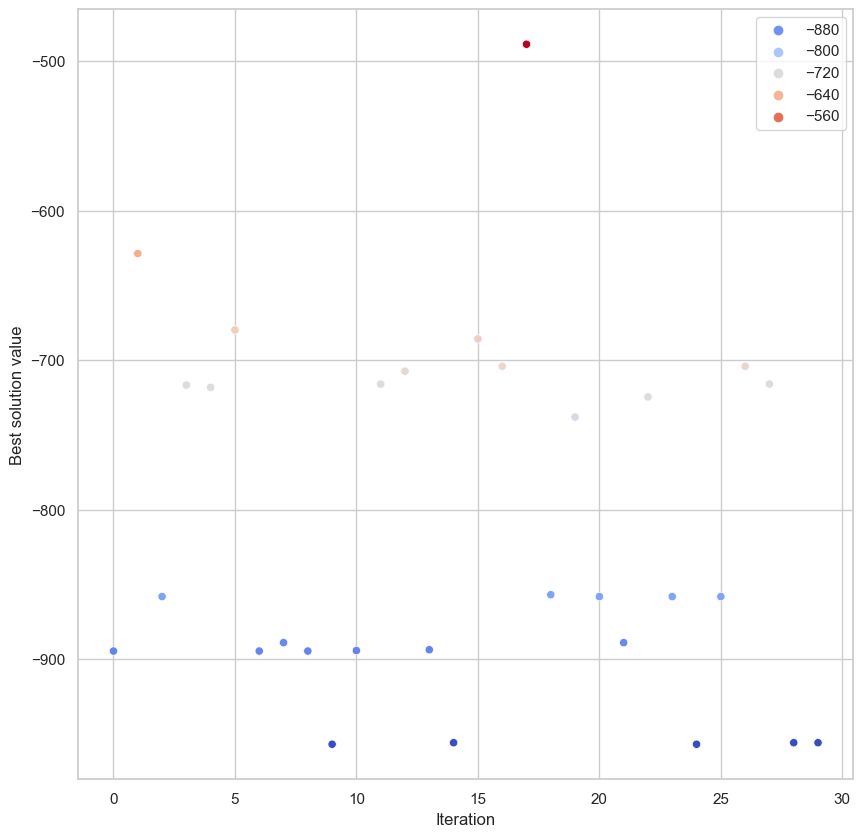

In [27]:
best_solution_iterations = []
ite_30 = []
for j in range(30):
    index_to_remove = []

    # Initialize the Tabu List
    tabu_list = []
    # Initialize the medium-term memory
    medium_term_memory = []
    # Initialize the long-term memory
    long_term_memory = [[0 for _ in range(22)] for _ in range(22)]

    s = initial_solution()
    best_solution = s
    best_solution_value = objective_function(s[0], s[1])
    medium_term_memory.append(s)
    iteration = 0
    iterations_without_improvement = 0
    while iteration < MAX_ITERATIONS:
        if iterations_without_improvement >= 100:
            s = medium_term_memory[-1]
            iterations_without_improvement = 0

        # Generate the neighbourhood of s
        candidates = neighbourhood_function(s[0], s[1], NEIGHBOURHOOD_LENGTH, long_term_memory=index_to_remove)

        # Evaluate the candidate solutions
        candidate_values = [objective_function(candidate[0], candidate[1]) for candidate in candidates]
        candidate_values = np.array(candidate_values)
        
        # Select the best candidate solution that is not in the tabu list
        best_candidate_index = np.argmin(candidate_values)
        best_candidate = candidates[best_candidate_index]
        best_candidate_value = candidate_values[best_candidate_index]
        best_candidate_move = reverse_move(s[0], s[1], best_candidate[0], best_candidate[1])
        while(best_candidate_move in tabu_list):
            if aspiration_criteria(s[0], s[1], best_candidate[0], best_candidate[1]):
                break
            candidate_values[best_candidate_index] = np.inf
            best_candidate_index = np.argmin(candidate_values)
            best_candidate = candidates[best_candidate_index]
            best_candidate_value = candidate_values[best_candidate_index]
            best_candidate_move = reverse_move(s[0], s[1], best_candidate[0], best_candidate[1])

        # Update the tabu list
        tabu_list.append(best_candidate_move)
        if len(tabu_list) > TABU_LENGTH:
            tabu_list.pop(0)
        
        # Update the medium-term memory and best solution
        if best_candidate_value < best_solution_value:
            best_solution = best_candidate
            best_solution_value = best_candidate_value
            medium_term_memory.append(best_candidate)
            if len(medium_term_memory) > MEDIUM_TERM_MEMORY_LENGTH:
                medium_term_memory.pop(0)
            iterations_without_improvement = 0
        else:
            iterations_without_improvement += 1
        
        # Update the long-term memory
        long_term_memory[best_candidate_move[0]][best_candidate_move[1]] += 1
        moves = frequence_moves(long_term_memory)
        if iteration % LONG_TERM_MEMORY_LENGTH == 0:
            long_term_memory[moves[-1][-1]][moves[-1][-1]] -= 1
        
        index_to_remove = moves[-10:]

        # Update the current solution
        s = best_candidate
        
        iteration += 1
    
    print(f'{j} - Best solution value: {best_solution_value}')
    best_solution_iterations.append(best_solution_value)
    ite_30.append(iteration)

print(f'Mean: {np.mean(best_solution_iterations)} - Std: {np.std(best_solution_iterations)}')

# Plot the best solutions
fig = plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x=range(30), y=best_solution_iterations, hue=best_solution_iterations, palette=cmap)
ax.set_xlabel('Iteration')
ax.set_ylabel('Best solution value')
plt.show()